In [1]:
import gps_particle_data
import wget
import os
import numpy as np 
import time
import json
import sys
import math
from datetime import datetime, timedelta, date
from itertools import compress
from random import randint
import urllib2
import aacgmv2
import scipy
import matplotlib
from matplotlib import gridspec
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Test 9th Oct 2006

start_date = datetime(2006,10,8,0,0,0);
end_date = datetime(2006,10,9,0,0,0);
ms = gps_particle_data.meta_search();
ms.load_data(start_date,end_date);

dcor = {}
signal = 'rate_electron_measured'
output_data = ms.get_all_data_by_satellite()
for i in range(11):
    a0 = np.asarray(output_data[59][signal])[:,2]
    ar2 = np.asarray(output_data[59][signal])[:,i]
    cor = np.correlate(a0, ar2)/(math.sqrt(np.sum(a0**2)*np.sum(ar2**2)))
    dcor.update({i:cor})
print dcor


Loading data for satellite  59
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns59/ns59_061008_v1.03.ascii
{0: array([ 0.87305073]), 1: array([ 0.94204532]), 2: array([ 1.]), 3: array([ 0.80692966]), 4: array([ 0.56820298]), 5: array([ 0.50170034]), 6: array([ 0.44089433]), 7: array([ 0.41378245]), 8: array([ 0.56745853]), 9: array([ 0.56006684]), 10: array([ 0.51876534])}


In [3]:
xv = dcor.values()
for i in range(len(xv)):
    sum_bins_up_to = []
    fname = 'ch2_'+str(i)+'.ascii'
    cor = np.loadtxt(fname)
    sort = np.histogram(cor, bins = np.arange(min(cor), max(cor)+0.1, 0.05))
    for j in range(len(sort[1])):
        if sort[1][j] <= xv[i] <= sort[1][j+1]:
            for k in np.arange(j+1):
                sum_bins_up_to.append(sort[0][k])
            tot_sum_up_to = np.sum(sum_bins_up_to)
            pvalue = float(tot_sum_up_to)/float(np.sum(sort[0]))
            print fname, xv[i], '%.2f' % (pvalue)

ch2_0.ascii [ 0.87305073] 0.43
ch2_1.ascii [ 0.94204532] 0.51
ch2_2.ascii [ 1.] 1.00
ch2_3.ascii [ 0.80692966] 0.11
ch2_4.ascii [ 0.56820298] 0.08
ch2_5.ascii [ 0.50170034] 0.16
ch2_6.ascii [ 0.44089433] 0.18
ch2_7.ascii [ 0.41378245] 0.18
ch2_8.ascii [ 0.56745853] 0.34
ch2_9.ascii [ 0.56006684] 0.25
ch2_10.ascii [ 0.51876534] 0.26


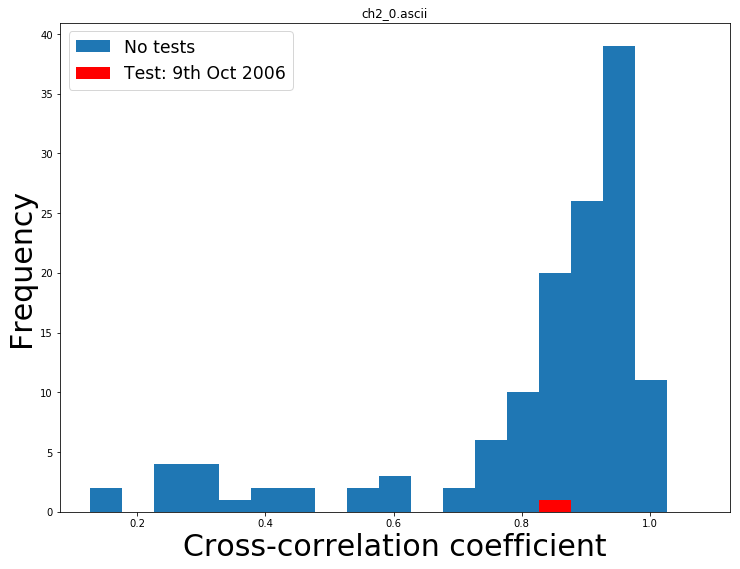

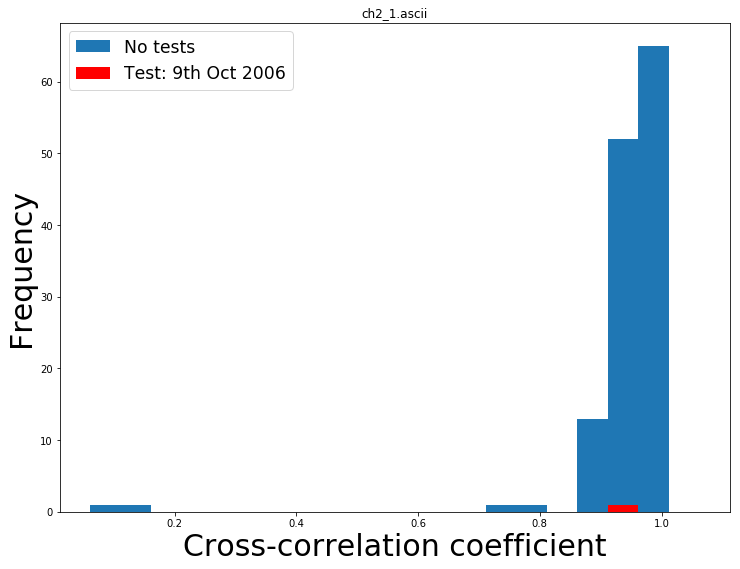

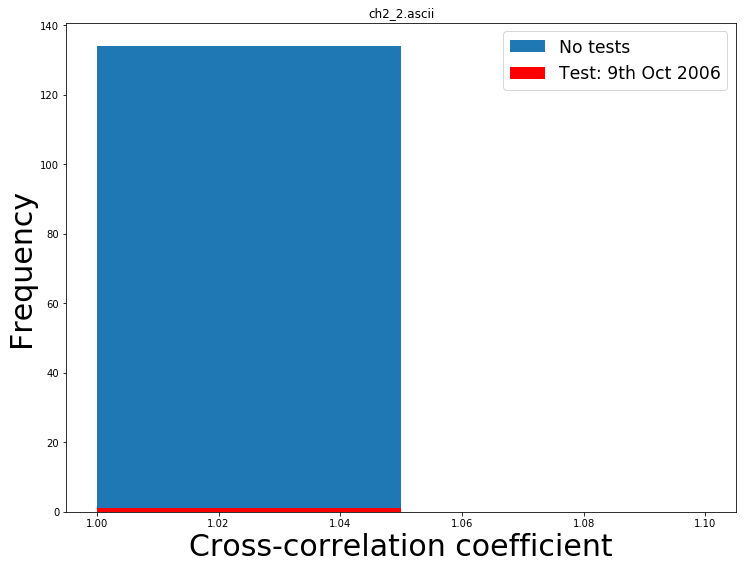

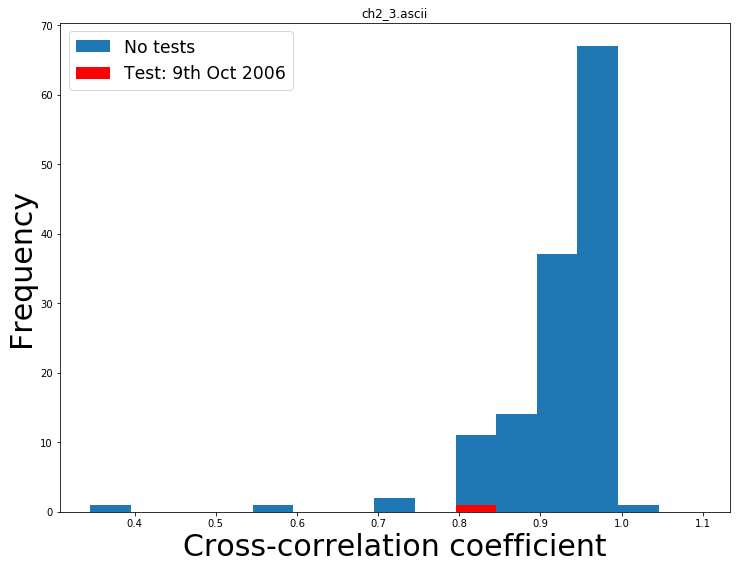

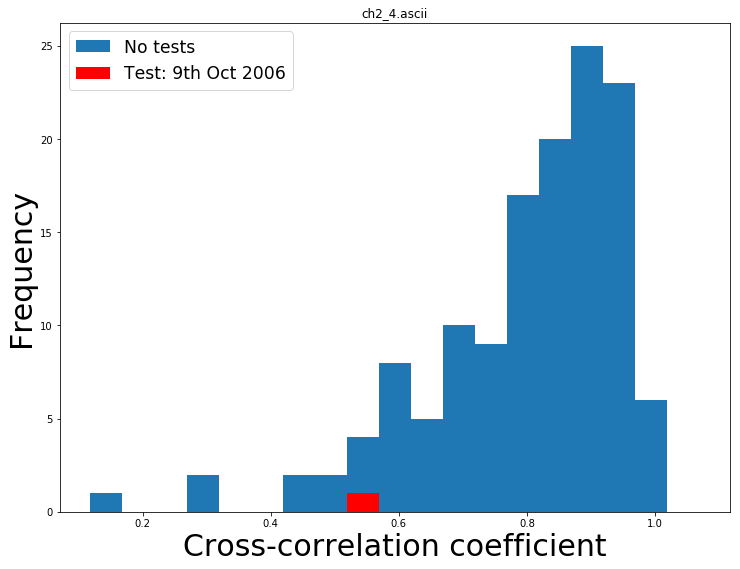

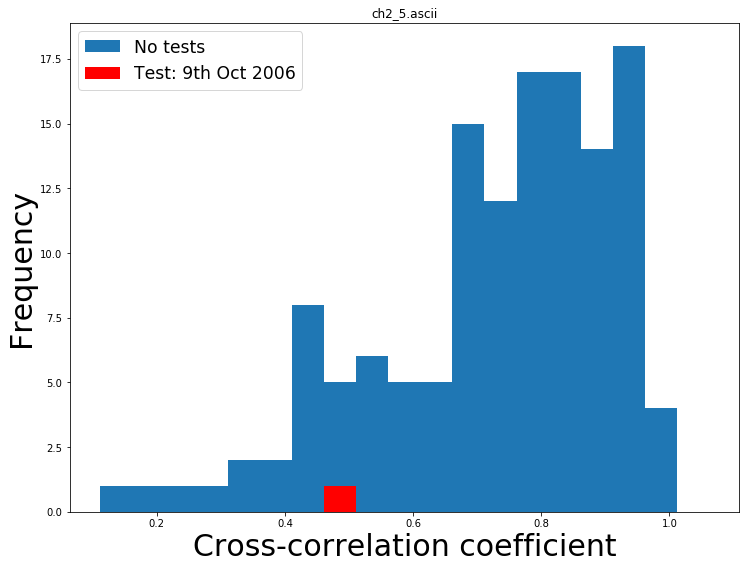

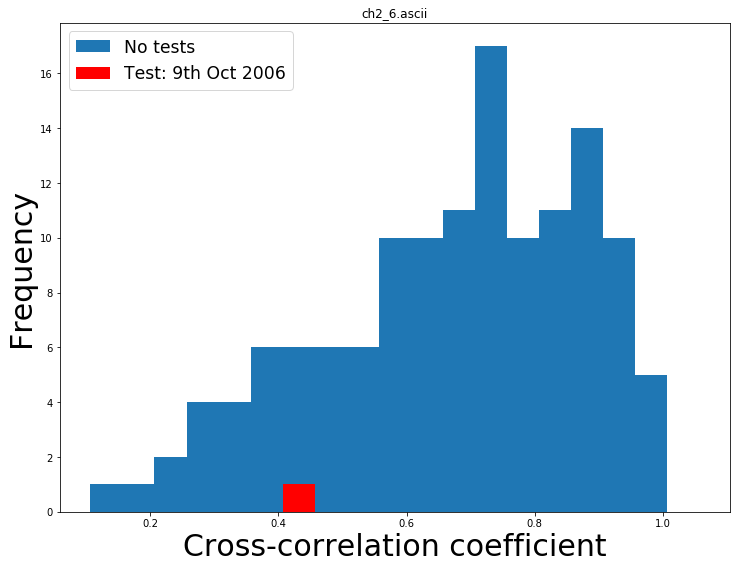

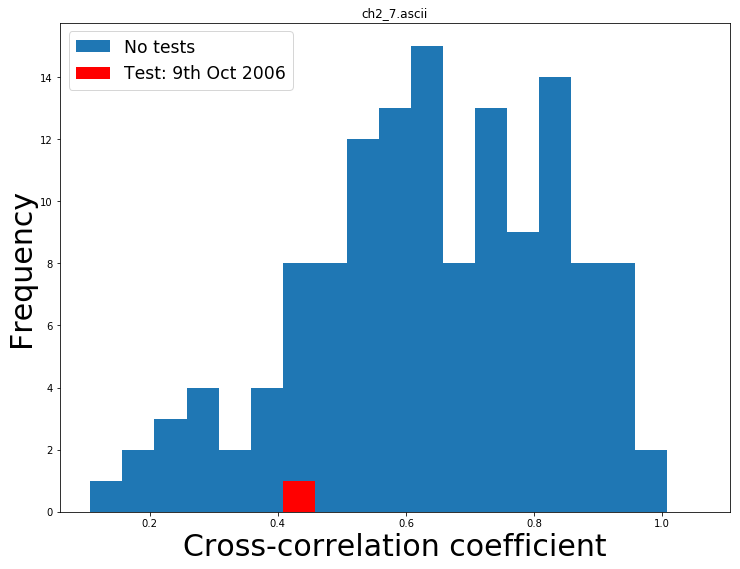

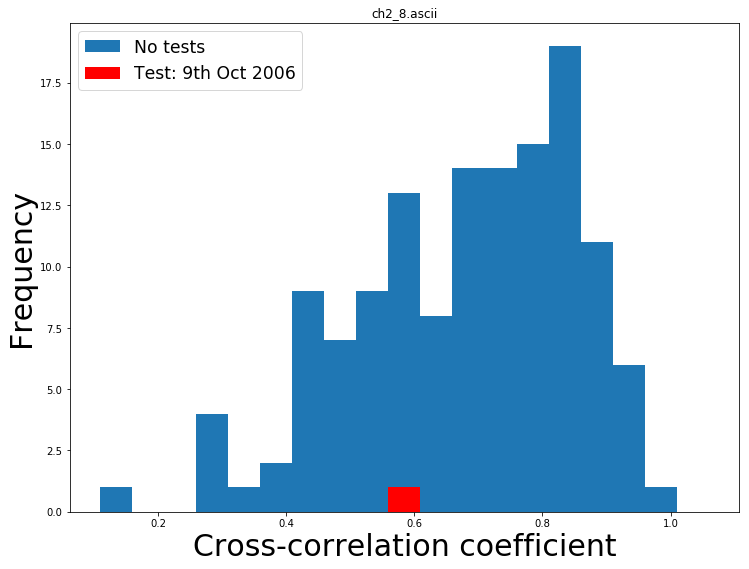

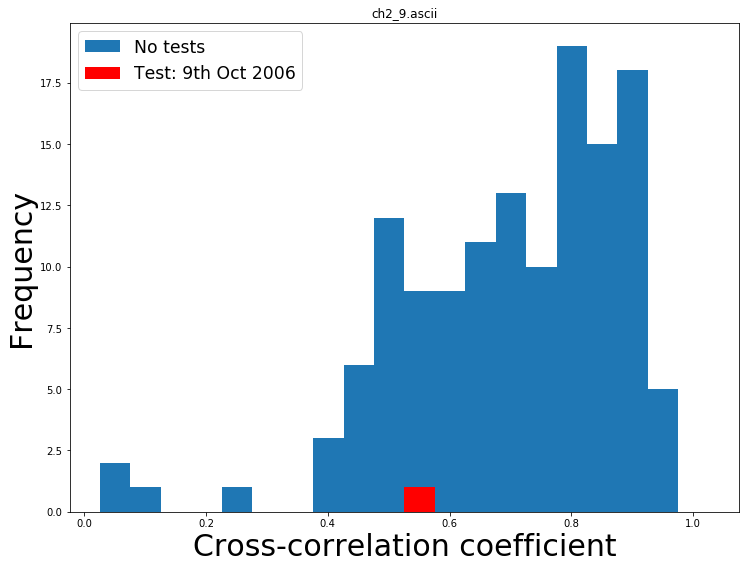

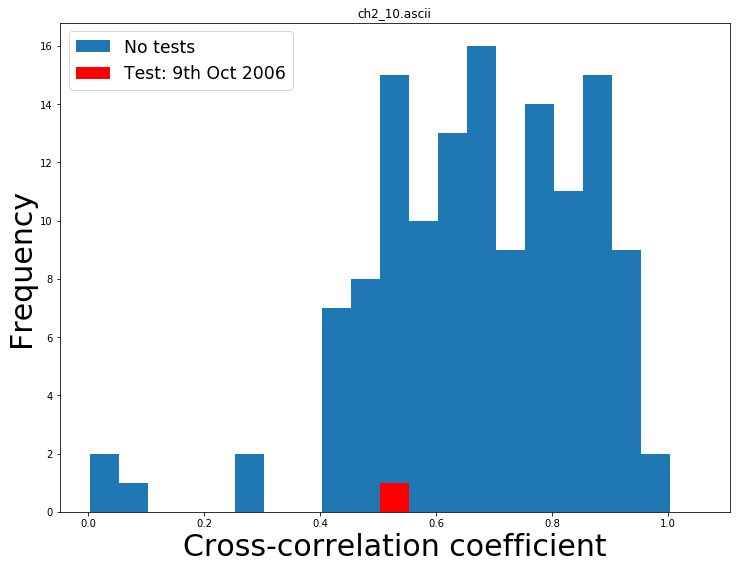

In [4]:
for i in range(11):
    fname = 'ch2_'+str(i)+'.ascii'
    fig = plt.figure(figsize=(12, 9))
    ax = fig.add_subplot(111)
    cor = np.loadtxt(fname)
    ax.hist(cor, bins = np.arange(min(cor), max(cor)+0.1, 0.05), label = 'No tests')
    ax.hist(xv[i], np.arange(min(cor), max(cor)+0.1, 0.05), color = 'red', label = 'Test: 9th Oct 2006')
    plt.title(fname)
    plt.xlabel('Cross-correlation coefficient', fontsize = 30)
    plt.ylabel('Frequency', fontsize = 30)
    plt.legend(fontsize = 'xx-large')
    plt.show()

In [6]:
#Test 25th May 2009

start_date = datetime(2009,5,20,0,0,0);
end_date = datetime(2009,5,26,0,0,0);
ms = gps_particle_data.meta_search();
ms.load_data(start_date,end_date);

dcor = {}
signal = 'rate_electron_measured'
output_data = ms.get_all_data_by_satellite()
for i in range(11):
    a0 = np.asarray(output_data[59][signal])[:,2]
    ar2 = np.asarray(output_data[59][signal])[:,i]
    cor = np.correlate(a0, ar2)/(math.sqrt(np.sum(a0**2)*np.sum(ar2**2)))
    dcor.update({i:cor})
print dcor


Loading data for satellite  59
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns59/ns59_090524_v1.03.ascii
{0: array([ 0.66382697]), 1: array([ 0.78089147]), 2: array([ 1.]), 3: array([ 0.94055335]), 4: array([ 0.90642332]), 5: array([ 0.79882213]), 6: array([ 0.79120794]), 7: array([ 0.86152105]), 8: array([ 0.85661073]), 9: array([ 0.85717284]), 10: array([ 0.85484458])}


In [7]:
xv = dcor.values()
for i in range(len(xv)):
    sum_bins_up_to = []
    fname = 'ch2_'+str(i)+'.ascii'
    cor = np.loadtxt(fname)
    sort = np.histogram(cor, bins = np.arange(min(cor), max(cor)+0.1, 0.05))
    for j in range(len(sort[1])):
        if sort[1][j] <= xv[i] <= sort[1][j+1]:
            for k in np.arange(j+1):
                sum_bins_up_to.append(sort[0][k])
            tot_sum_up_to = np.sum(sum_bins_up_to)
            pvalue = float(tot_sum_up_to)/float(np.sum(sort[0]))
            print fname, xv[i], '%.2f' % (pvalue)

ch2_0.ascii [ 0.66382697] 0.15
ch2_1.ascii [ 0.78089147] 0.03
ch2_2.ascii [ 1.] 1.00
ch2_3.ascii [ 0.94055335] 0.49
ch2_4.ascii [ 0.90642332] 0.78
ch2_5.ascii [ 0.79882213] 0.60
ch2_6.ascii [ 0.79120794] 0.70
ch2_7.ascii [ 0.86152105] 0.93
ch2_8.ascii [ 0.85661073] 0.87
ch2_9.ascii [ 0.85717284] 0.83
ch2_10.ascii [ 0.85484458] 0.92


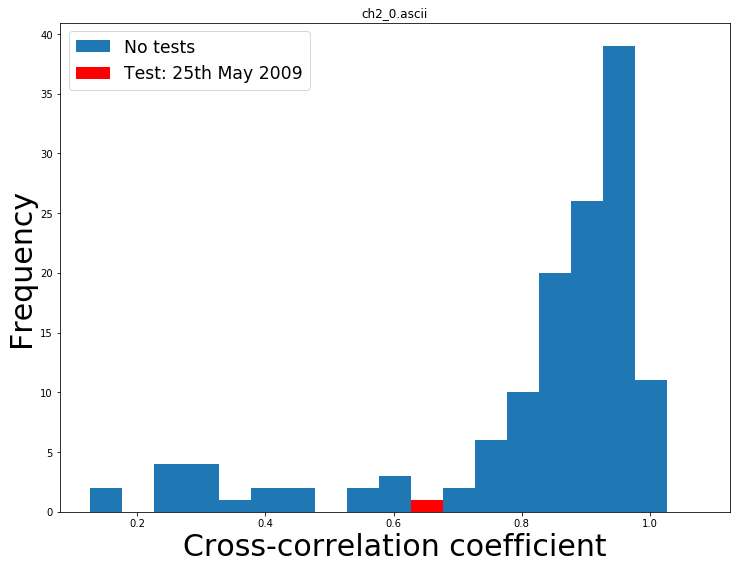

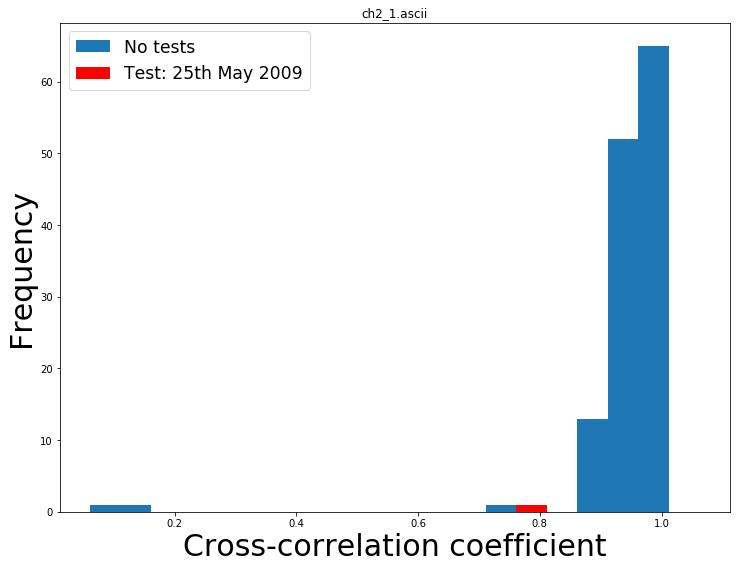

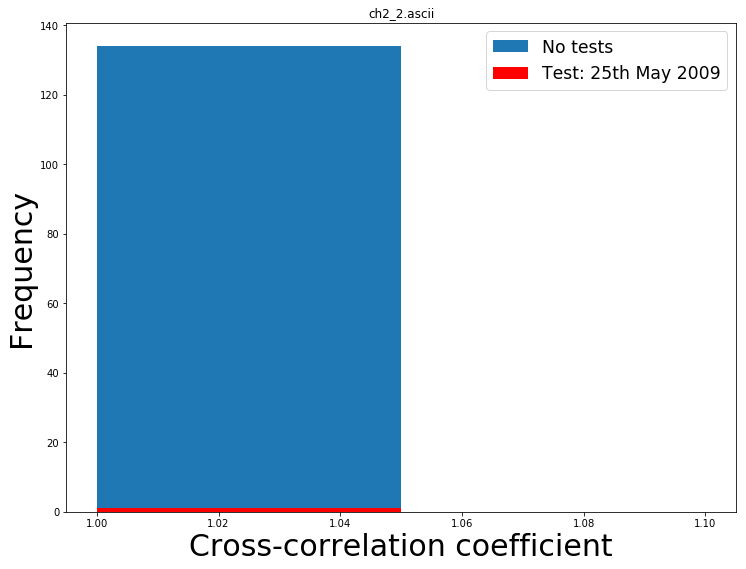

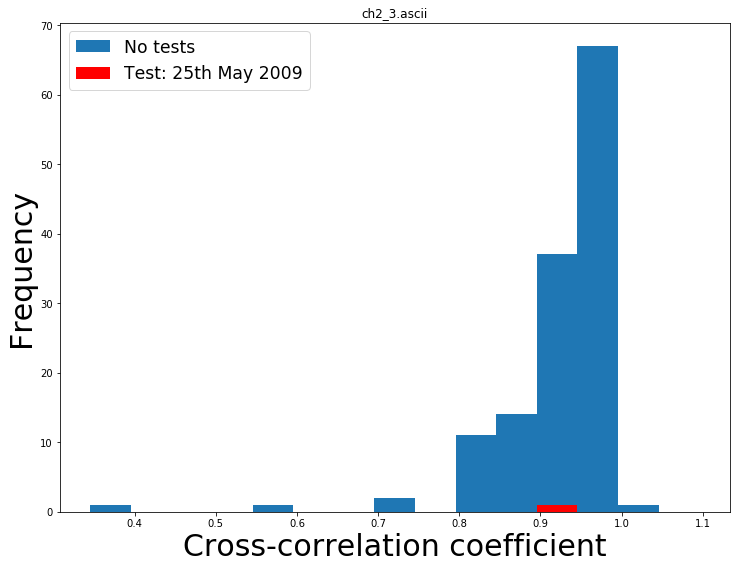

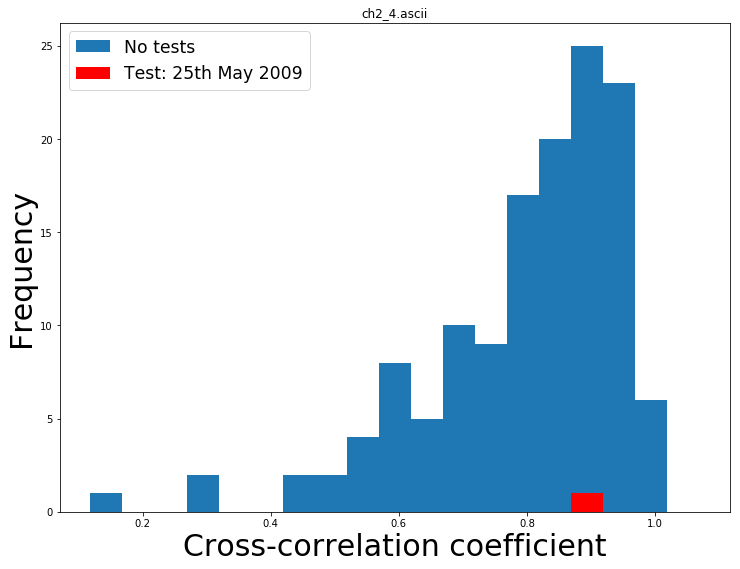

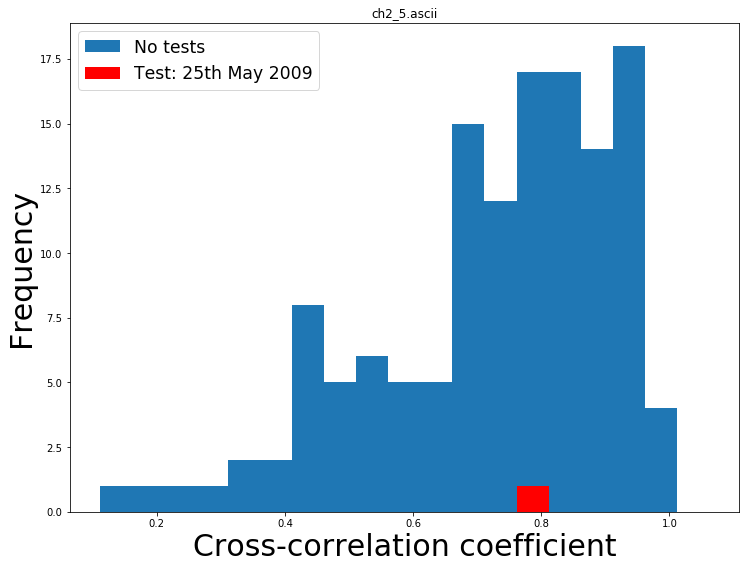

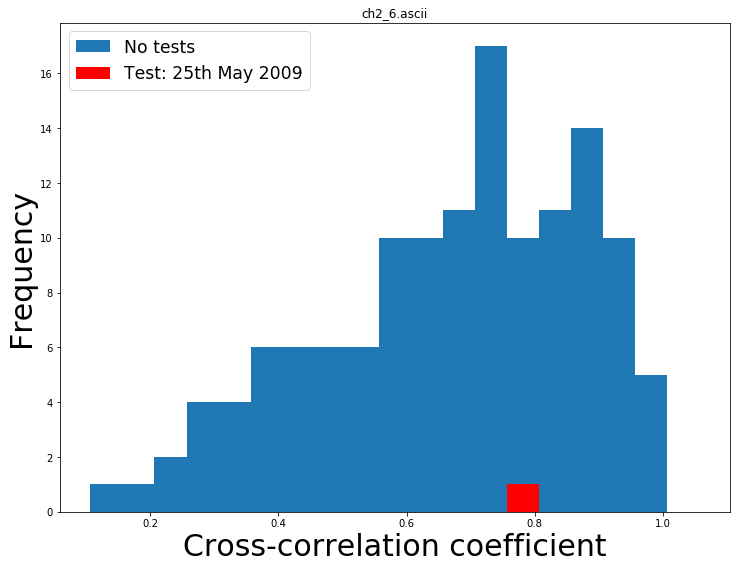

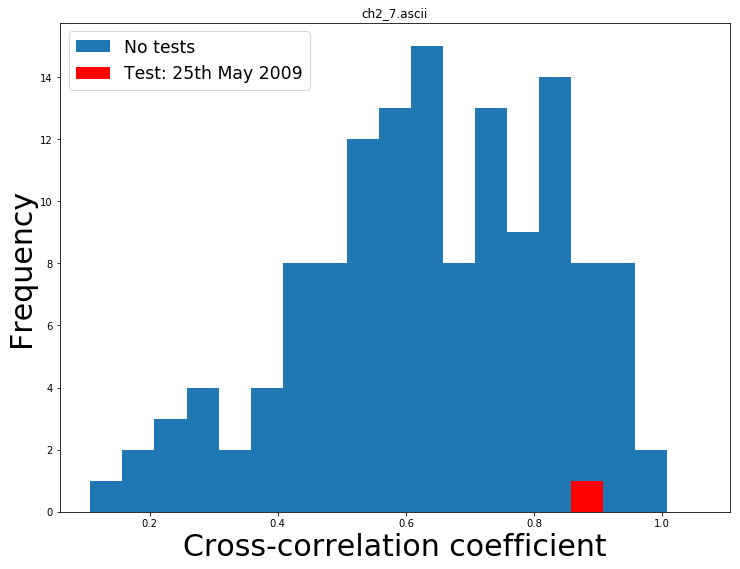

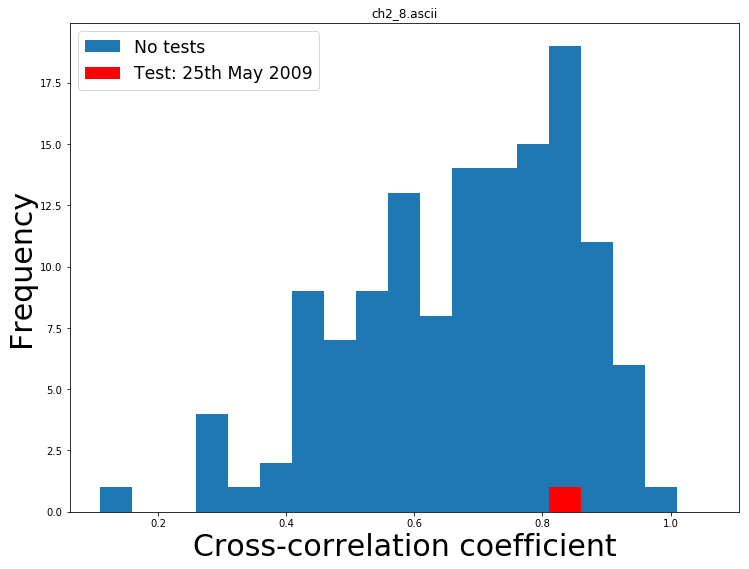

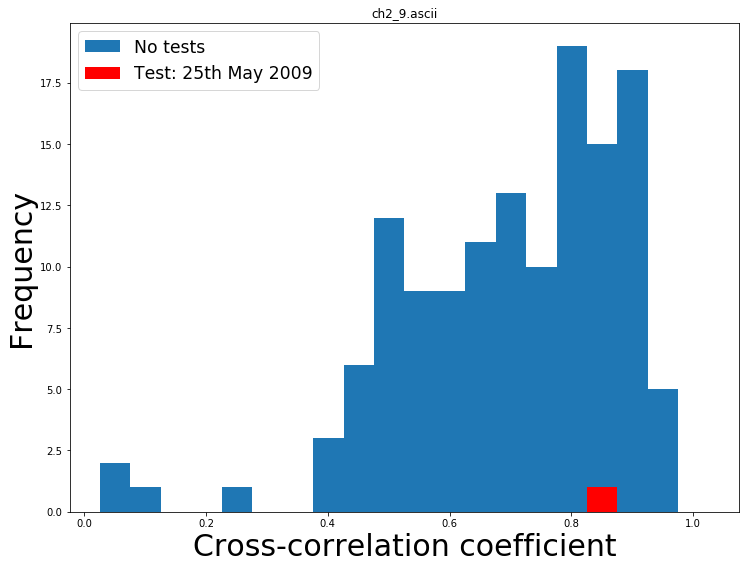

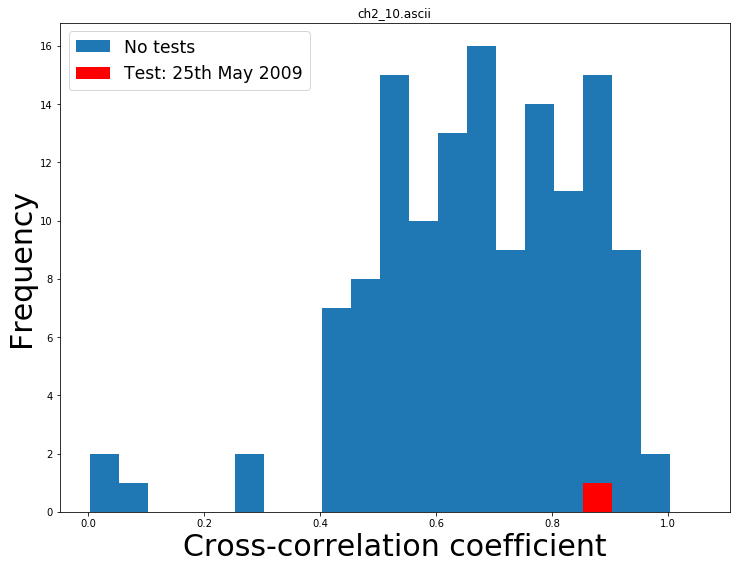

In [8]:
for i in range(11):
    fname = 'ch2_'+str(i)+'.ascii'
    fig = plt.figure(figsize=(12, 9))
    ax = fig.add_subplot(111)
    cor = np.loadtxt(fname)
    ax.hist(cor, bins = np.arange(min(cor), max(cor)+0.1, 0.05), label = 'No tests')
    ax.hist(xv[i], np.arange(min(cor), max(cor)+0.1, 0.05), color = 'red', label = 'Test: 25th May 2009')
    plt.title(fname)
    plt.xlabel('Cross-correlation coefficient', fontsize = 30)
    plt.ylabel('Frequency', fontsize = 30)
    plt.legend(fontsize = 'xx-large')
    plt.show()

In [9]:
#Test 12th Feb 2013

start_date = datetime(2013,2,9,0,0,0);
end_date = datetime(2013,2,13,0,0,0);
ms = gps_particle_data.meta_search();
ms.load_data(start_date,end_date);

dcor = {}
signal = 'rate_electron_measured'
output_data = ms.get_all_data_by_satellite()
for i in range(11):
    a0 = np.asarray(output_data[59][signal])[:,2]
    ar2 = np.asarray(output_data[59][signal])[:,i]
    cor = np.correlate(a0, ar2)/(math.sqrt(np.sum(a0**2)*np.sum(ar2**2)))
    dcor.update({i:cor})
print dcor


Loading data for satellite  59
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns59/ns59_130210_v1.03.ascii
{0: array([ 0.68037488]), 1: array([ 0.97176753]), 2: array([ 1.]), 3: array([ 0.94877036]), 4: array([ 0.57530281]), 5: array([ 0.3996414]), 6: array([ 0.27240629]), 7: array([ 0.22391387]), 8: array([ 0.25821964]), 9: array([ 0.35042389]), 10: array([ 0.42720971])}


In [10]:
xv = dcor.values()
for i in range(len(xv)):
    sum_bins_up_to = []
    fname = 'ch2_'+str(i)+'.ascii'
    cor = np.loadtxt(fname)
    sort = np.histogram(cor, bins = np.arange(min(cor), max(cor)+0.1, 0.05))
    for j in range(len(sort[1])):
        if sort[1][j] <= xv[i] <= sort[1][j+1]:
            for k in np.arange(j+1):
                sum_bins_up_to.append(sort[0][k])
            tot_sum_up_to = np.sum(sum_bins_up_to)
            pvalue = float(tot_sum_up_to)/float(np.sum(sort[0]))
            print fname, xv[i], '%.2f' % (pvalue)

ch2_0.ascii [ 0.68037488] 0.16
ch2_1.ascii [ 0.97176753] 1.00
ch2_2.ascii [ 1.] 1.00
ch2_3.ascii [ 0.94877036] 0.99
ch2_4.ascii [ 0.57530281] 0.14
ch2_5.ascii [ 0.3996414] 0.06
ch2_6.ascii [ 0.27240629] 0.06
ch2_7.ascii [ 0.22391387] 0.04
ch2_8.ascii [ 0.25821964] 0.01
ch2_9.ascii [ 0.35042389] 0.03
ch2_10.ascii [ 0.42720971] 0.09


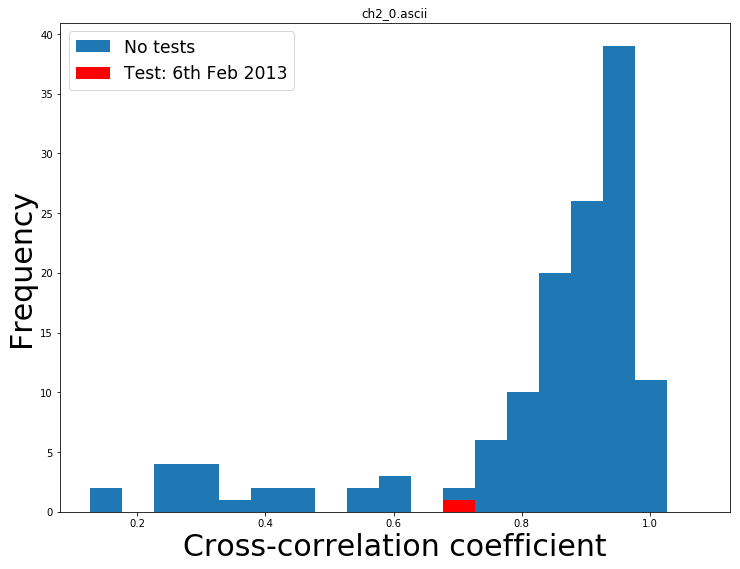

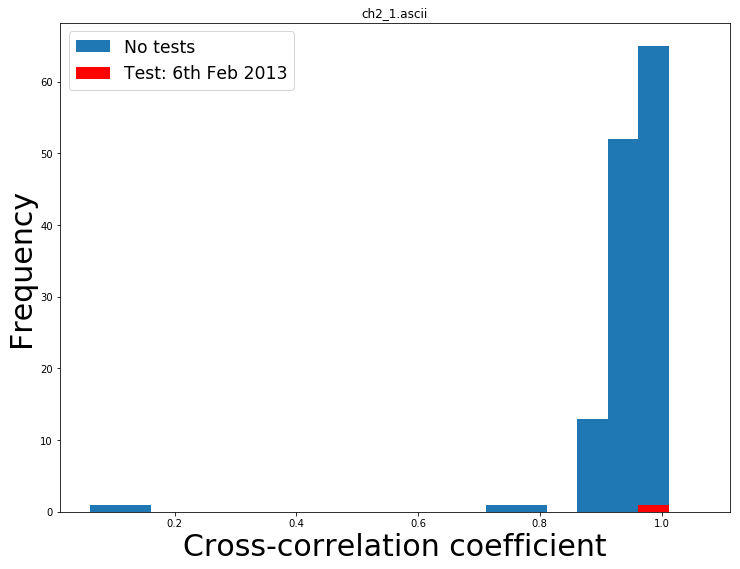

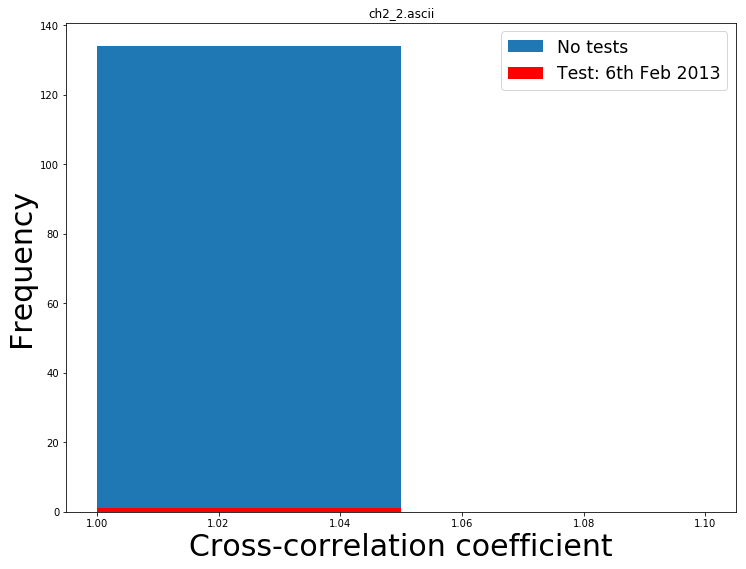

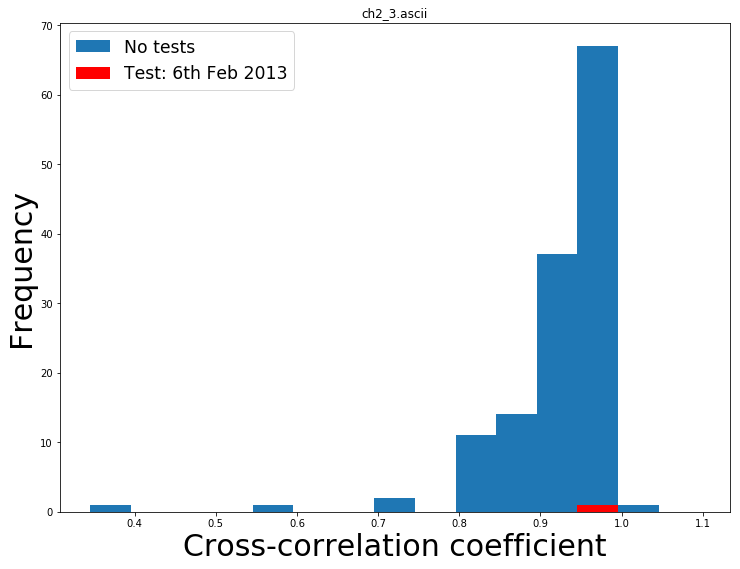

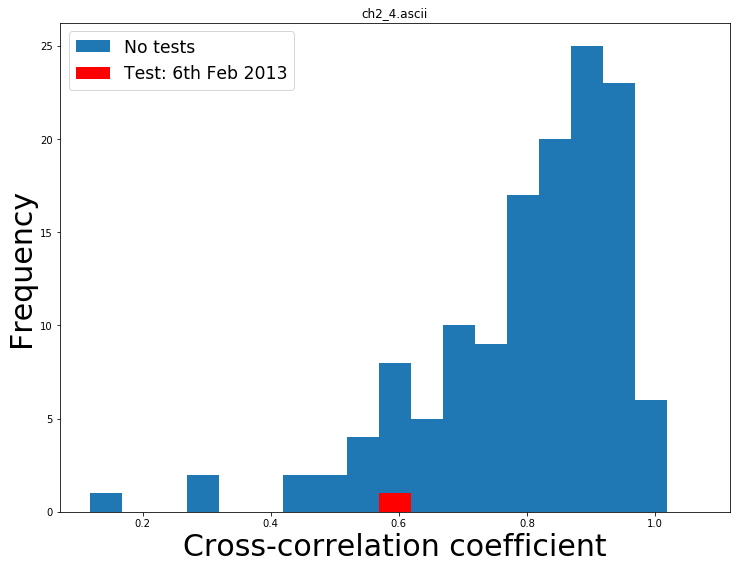

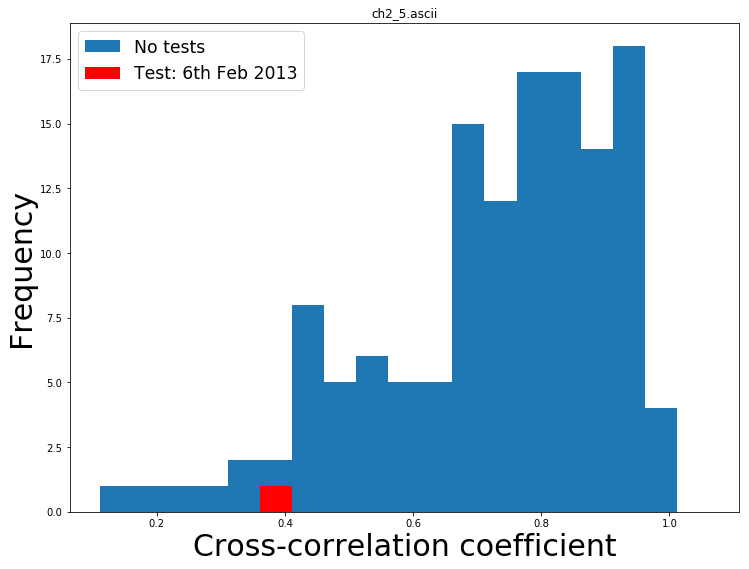

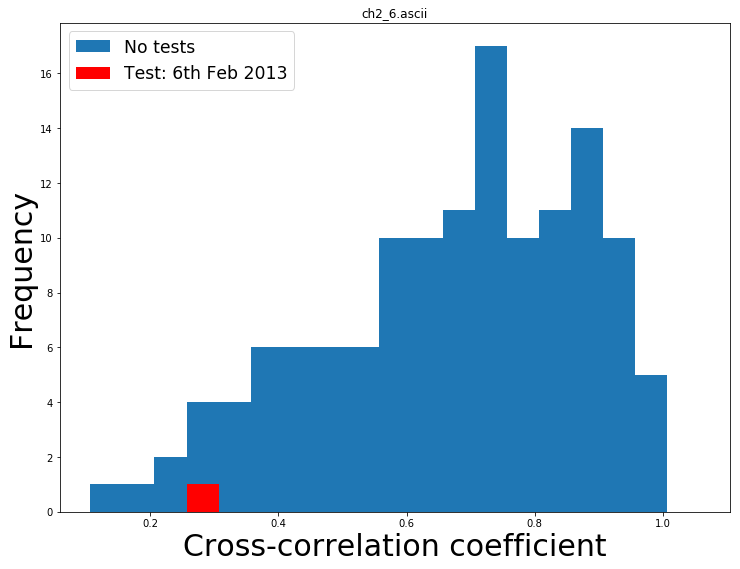

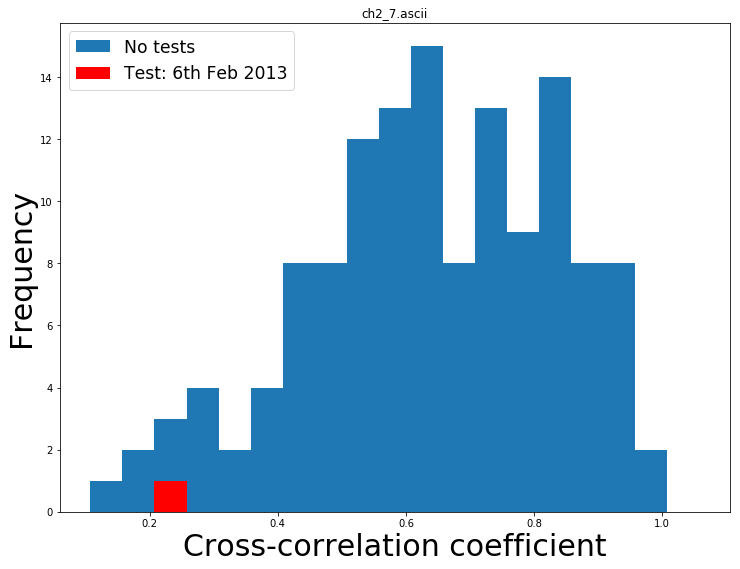

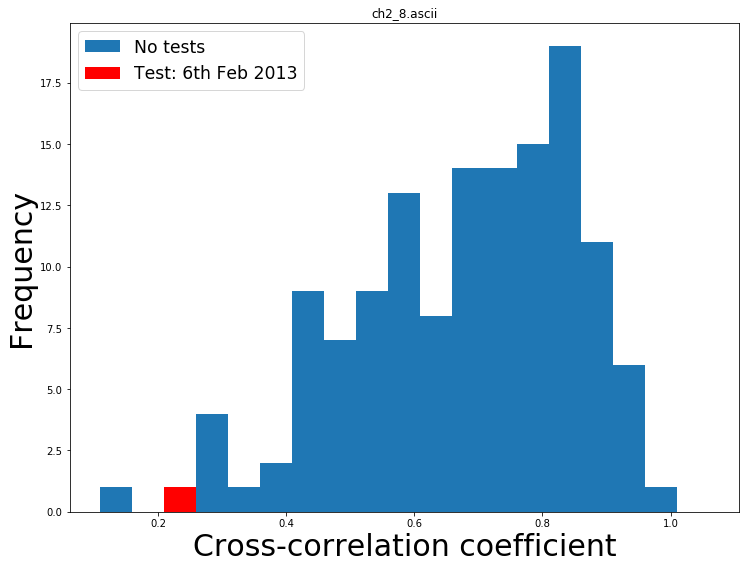

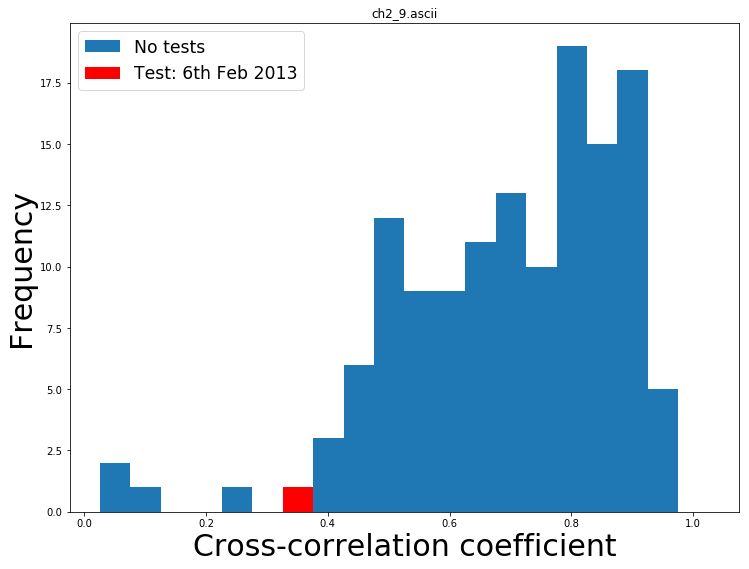

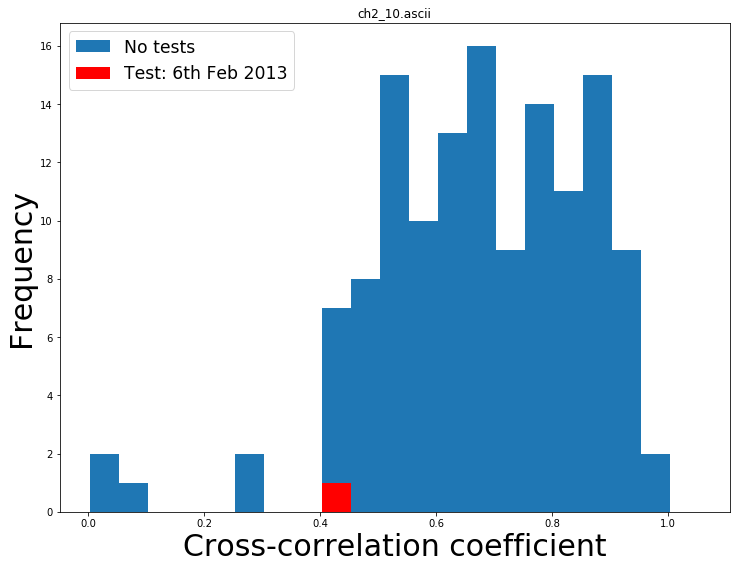

In [11]:
for i in range(11):
    fname = 'ch2_'+str(i)+'.ascii'
    fig = plt.figure(figsize=(12, 9))
    ax = fig.add_subplot(111)
    cor = np.loadtxt(fname)
    ax.hist(cor, bins = np.arange(min(cor), max(cor)+0.1, 0.05), label = 'No tests')
    ax.hist(xv[i], np.arange(min(cor), max(cor)+0.1, 0.05), color = 'red', label = 'Test: 6th Feb 2013')
    plt.title(fname)
    plt.xlabel('Cross-correlation coefficient', fontsize = 30)
    plt.ylabel('Frequency', fontsize = 30)
    plt.legend(fontsize = 'xx-large')
    plt.show()

In [12]:
#Test 6th Jan 2016

start_date = datetime(2016,1,2,0,0,0);
end_date = datetime(2016,1,7,0,0,0);
ms = gps_particle_data.meta_search();
ms.load_data(start_date,end_date);

dcor = {}
signal = 'rate_electron_measured'
output_data = ms.get_all_data_by_satellite()
for i in range(11):
    a0 = np.asarray(output_data[59][signal])[:,2]
    ar2 = np.asarray(output_data[59][signal])[:,i]
    cor = np.correlate(a0, ar2)/(math.sqrt(np.sum(a0**2)*np.sum(ar2**2)))
    dcor.update({i:cor})
print dcor


Loading data for satellite  59
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns59/ns59_160103_v1.03.ascii
{0: array([ 0.99230772]), 1: array([ 0.99716444]), 2: array([ 1.]), 3: array([ 0.98769164]), 4: array([ 0.96434415]), 5: array([ 0.95040146]), 6: array([ 0.93425413]), 7: array([ 0.91712068]), 8: array([ 0.92258785]), 9: array([ 0.93824642]), 10: array([ 0.93892139])}


In [13]:
xv = dcor.values()
for i in range(len(xv)):
    sum_bins_up_to = []
    fname = 'ch2_'+str(i)+'.ascii'
    cor = np.loadtxt(fname)
    sort = np.histogram(cor, bins = np.arange(min(cor), max(cor)+0.1, 0.05))
    for j in range(len(sort[1])):
        if sort[1][j] <= xv[i] <= sort[1][j+1]:
            for k in np.arange(j+1):
                sum_bins_up_to.append(sort[0][k])
            tot_sum_up_to = np.sum(sum_bins_up_to)
            pvalue = float(tot_sum_up_to)/float(np.sum(sort[0]))
            print fname, xv[i], '%.2f' % (pvalue)

ch2_0.ascii [ 0.99230772] 1.00
ch2_1.ascii [ 0.99716444] 1.00
ch2_2.ascii [ 1.] 1.00
ch2_3.ascii [ 0.98769164] 0.99
ch2_4.ascii [ 0.96434415] 0.96
ch2_5.ascii [ 0.95040146] 0.97
ch2_6.ascii [ 0.93425413] 0.96
ch2_7.ascii [ 0.91712068] 0.99
ch2_8.ascii [ 0.92258785] 0.99
ch2_9.ascii [ 0.93824642] 1.00
ch2_10.ascii [ 0.93892139] 0.99


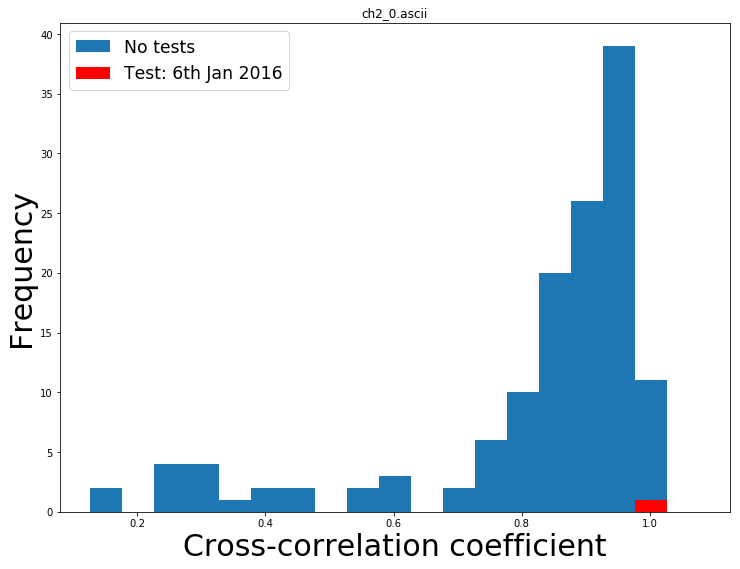

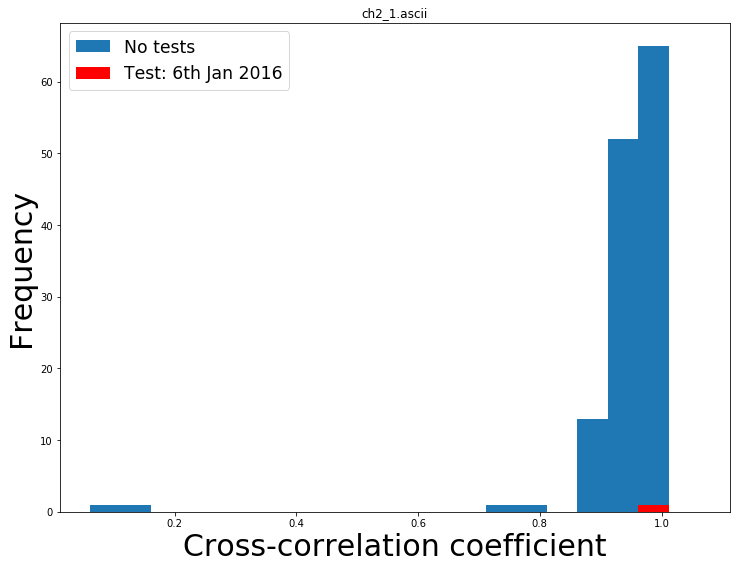

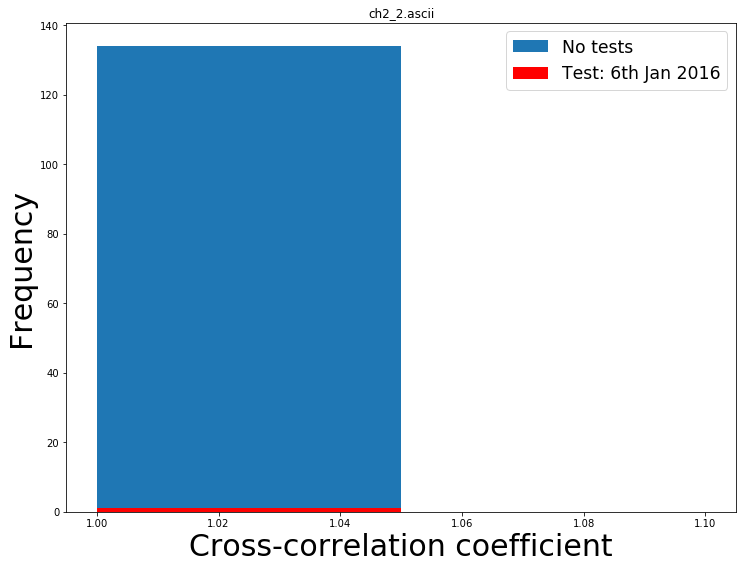

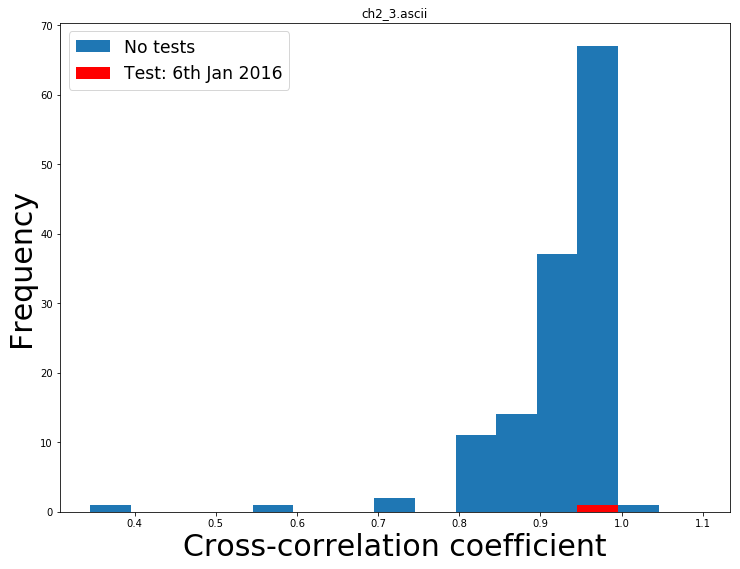

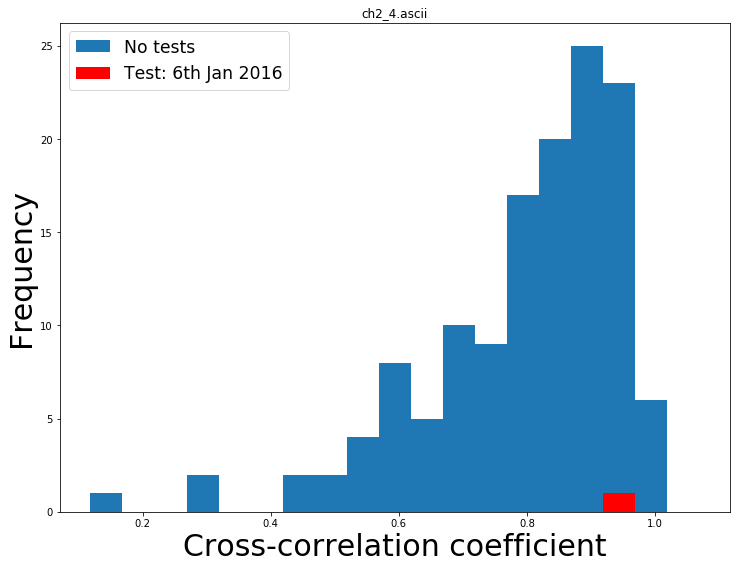

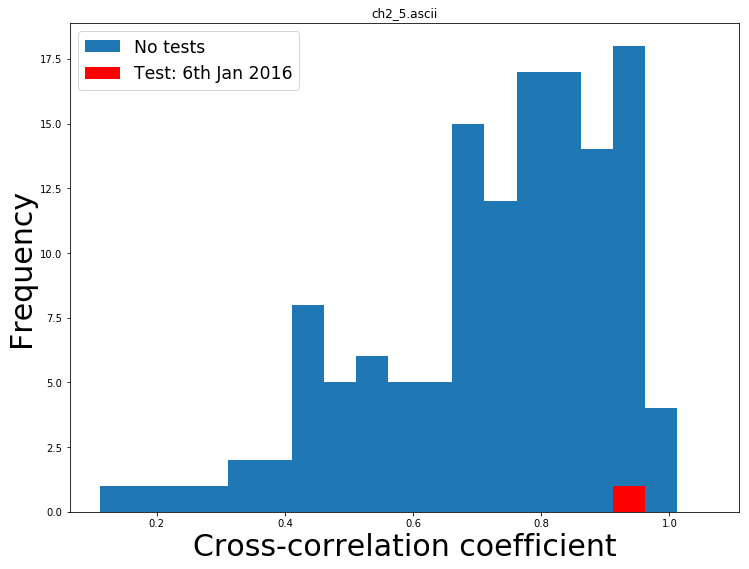

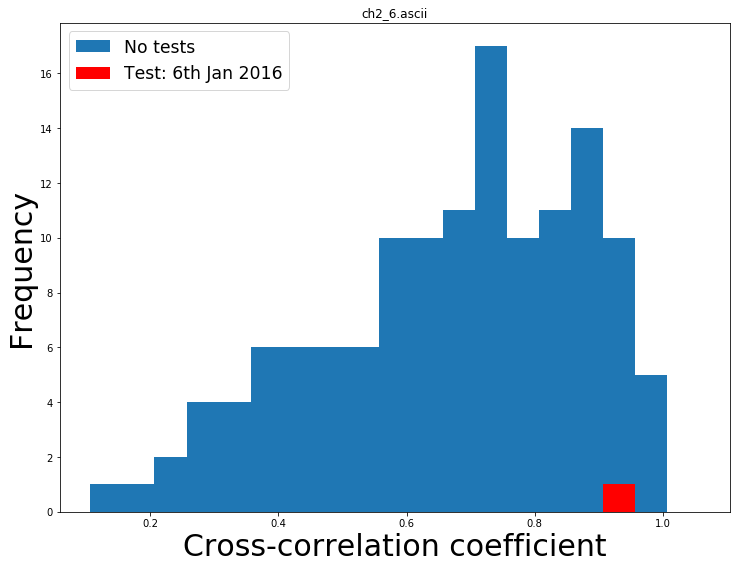

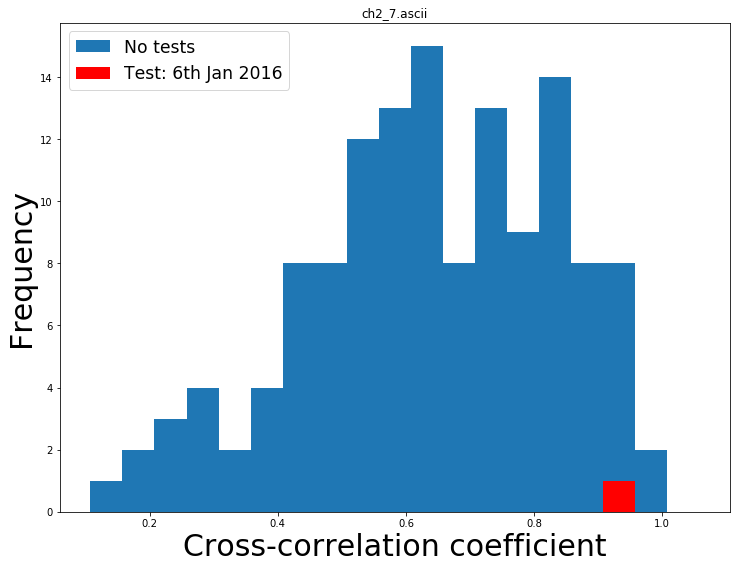

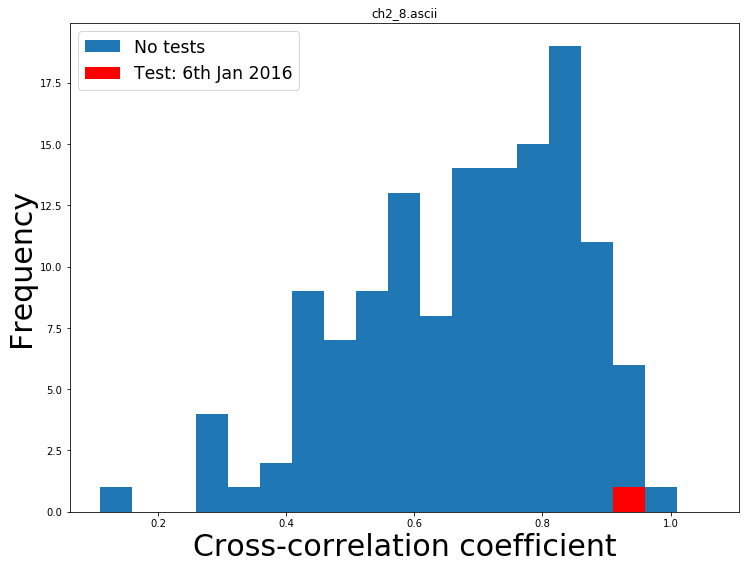

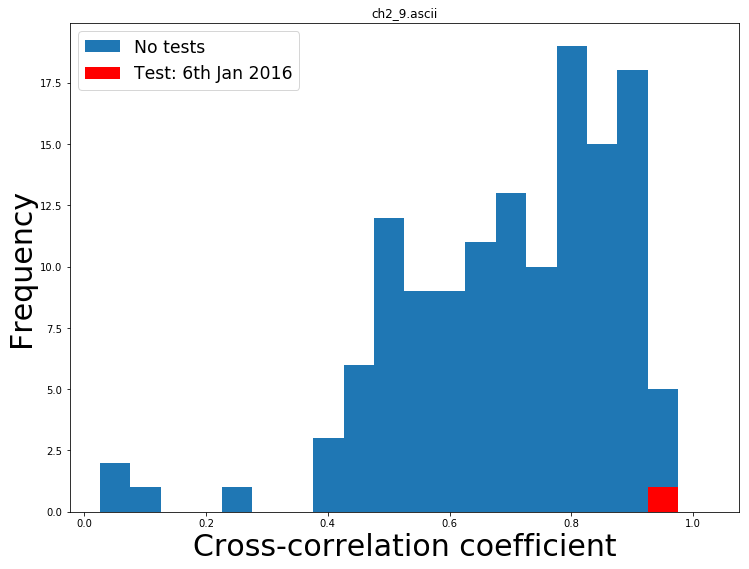

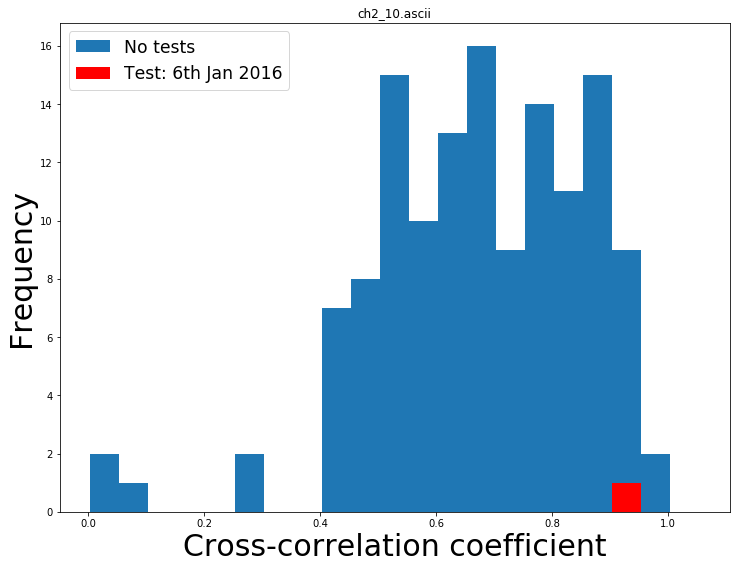

In [14]:
for i in range(11):
    fname = 'ch2_'+str(i)+'.ascii'
    fig = plt.figure(figsize=(12, 9))
    ax = fig.add_subplot(111)
    cor = np.loadtxt(fname)
    ax.hist(cor, bins = np.arange(min(cor), max(cor)+0.1, 0.05), label = 'No tests')
    ax.hist(xv[i], np.arange(min(cor), max(cor)+0.1, 0.05), color = 'red', label = 'Test: 6th Jan 2016')
    plt.title(fname)
    plt.xlabel('Cross-correlation coefficient', fontsize = 30)
    plt.ylabel('Frequency', fontsize = 30)
    plt.legend(fontsize = 'xx-large')
    plt.show()

In [15]:
#Test 9th Sept 2016

start_date = datetime(2016,9,4,0,0,0);
end_date = datetime(2016,9,10,0,0,0);
ms = gps_particle_data.meta_search();
ms.load_data(start_date,end_date);

dcor = {}
signal = 'rate_electron_measured'
output_data = ms.get_all_data_by_satellite()
for i in range(11):
    a0 = np.asarray(output_data[59][signal])[:,2]
    ar2 = np.asarray(output_data[59][signal])[:,i]
    cor = np.correlate(a0, ar2)/(math.sqrt(np.sum(a0**2)*np.sum(ar2**2)))
    dcor.update({i:cor})
print dcor


Loading data for satellite  59
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns59/ns59_160904_v1.03.ascii
{0: array([ 0.9956878]), 1: array([ 0.99864357]), 2: array([ 1.]), 3: array([ 0.99565808]), 4: array([ 0.97472231]), 5: array([ 0.95996842]), 6: array([ 0.93342207]), 7: array([ 0.89494962]), 8: array([ 0.88238411]), 9: array([ 0.92340654]), 10: array([ 0.92497085])}


In [16]:
xv = dcor.values()
for i in range(len(xv)):
    sum_bins_up_to = []
    fname = 'ch2_'+str(i)+'.ascii'
    cor = np.loadtxt(fname)
    sort = np.histogram(cor, bins = np.arange(min(cor), max(cor)+0.1, 0.05))
    for j in range(len(sort[1])):
        if sort[1][j] <= xv[i] <= sort[1][j+1]:
            for k in np.arange(j+1):
                sum_bins_up_to.append(sort[0][k])
            tot_sum_up_to = np.sum(sum_bins_up_to)
            pvalue = float(tot_sum_up_to)/float(np.sum(sort[0]))
            print fname, xv[i], '%.2f' % (pvalue)

ch2_0.ascii [ 0.9956878] 1.00
ch2_1.ascii [ 0.99864357] 1.00
ch2_2.ascii [ 1.] 1.00
ch2_3.ascii [ 0.99565808] 1.00
ch2_4.ascii [ 0.97472231] 1.00
ch2_5.ascii [ 0.95996842] 0.97
ch2_6.ascii [ 0.93342207] 0.96
ch2_7.ascii [ 0.89494962] 0.93
ch2_8.ascii [ 0.88238411] 0.95
ch2_9.ascii [ 0.92340654] 0.96
ch2_10.ascii [ 0.92497085] 0.99


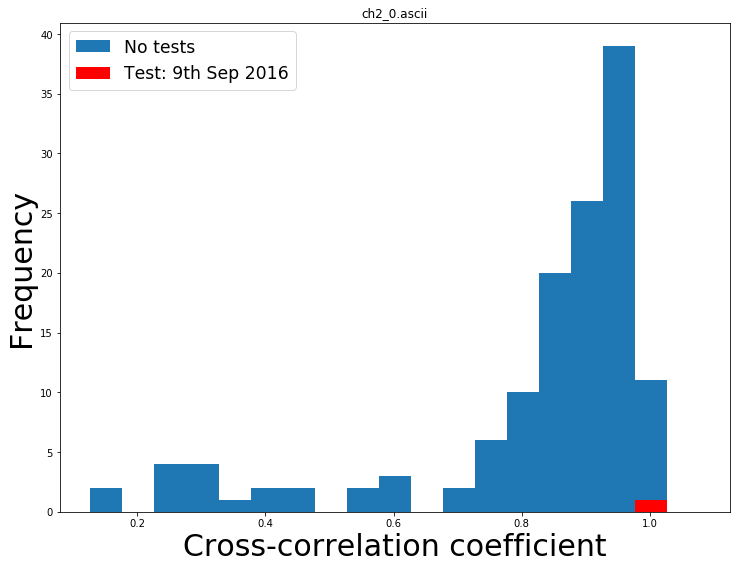

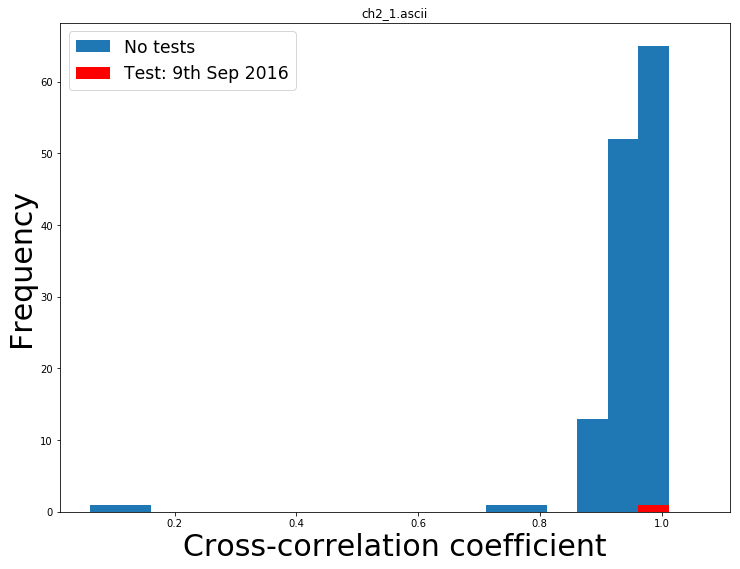

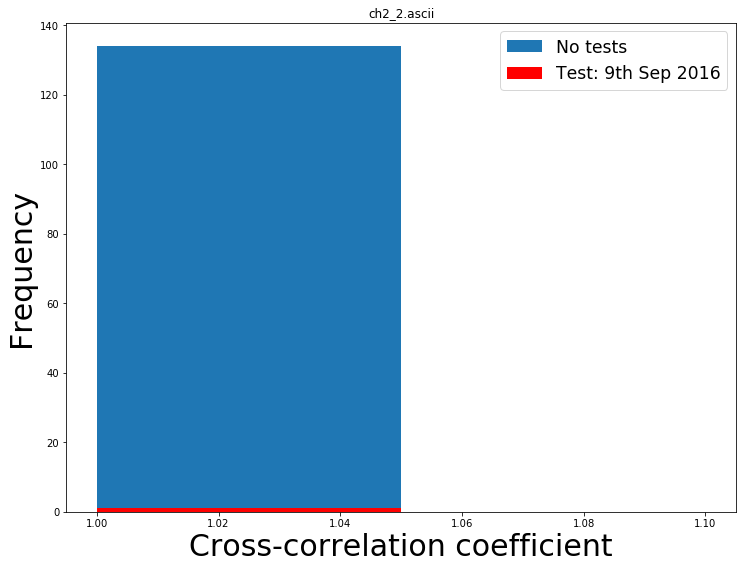

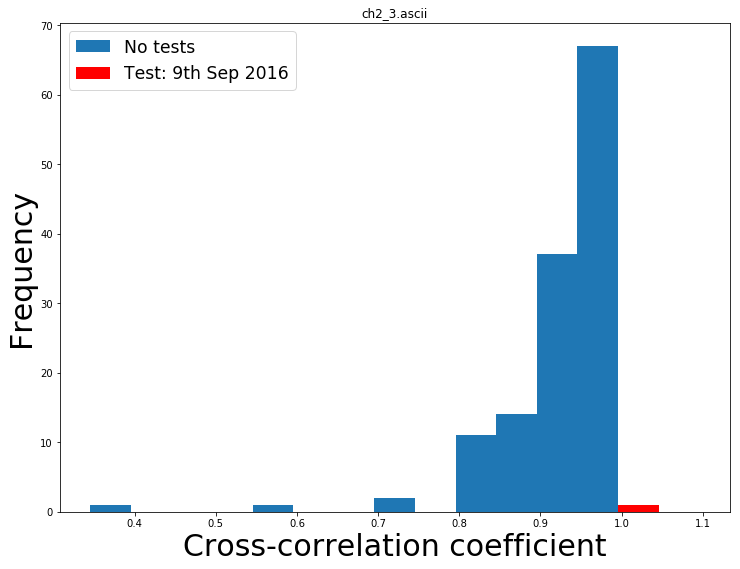

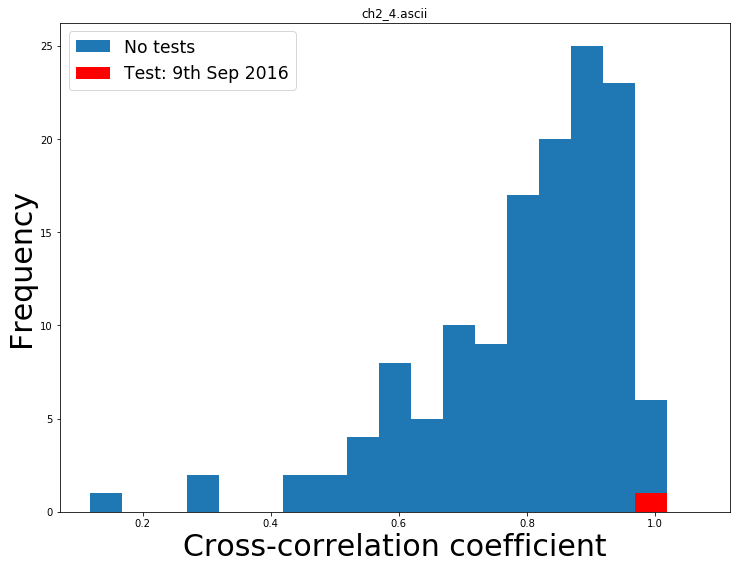

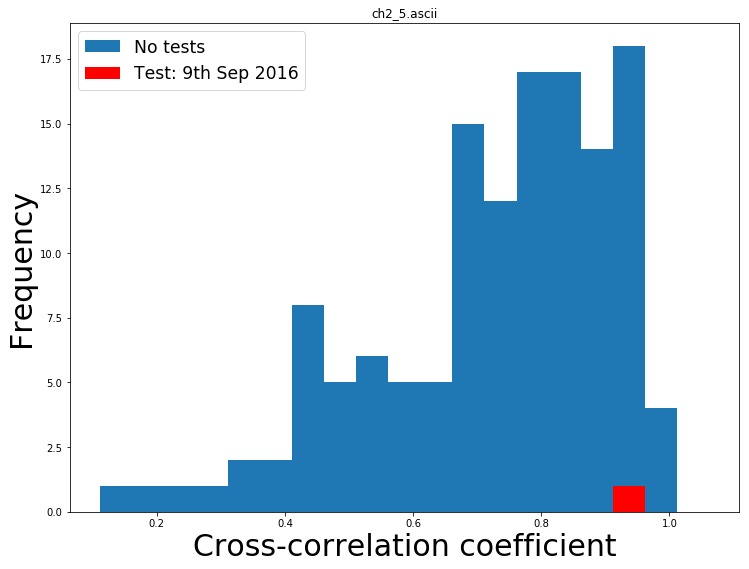

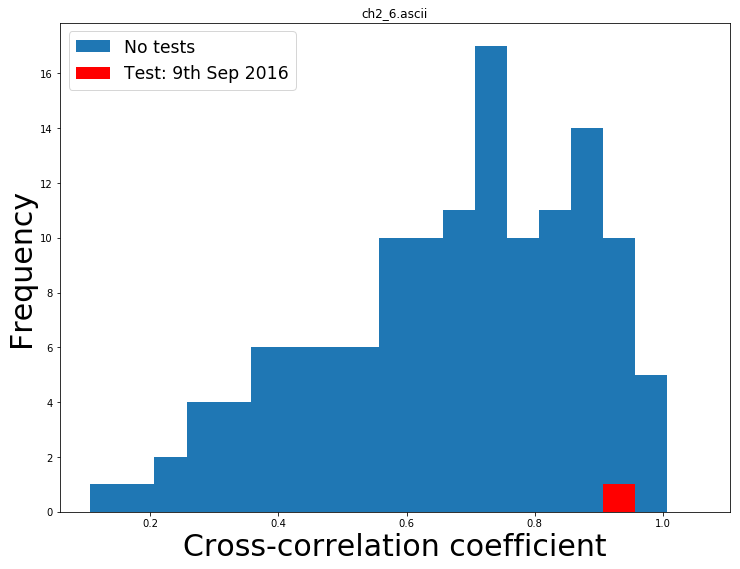

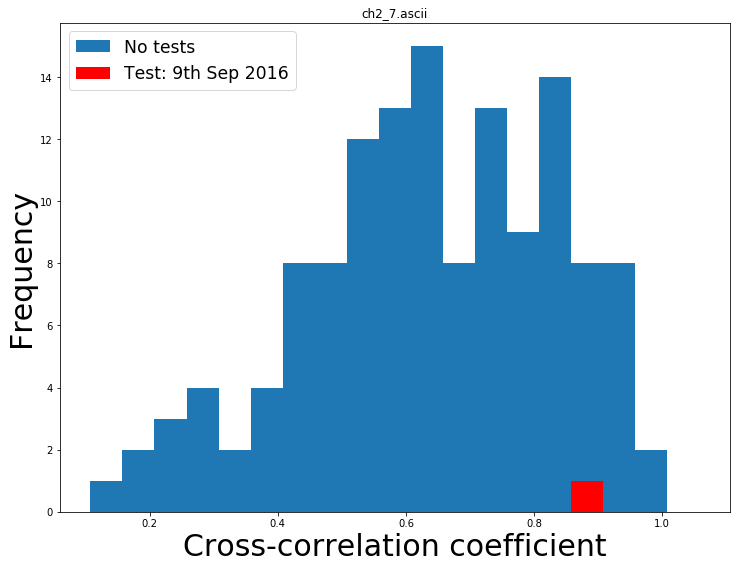

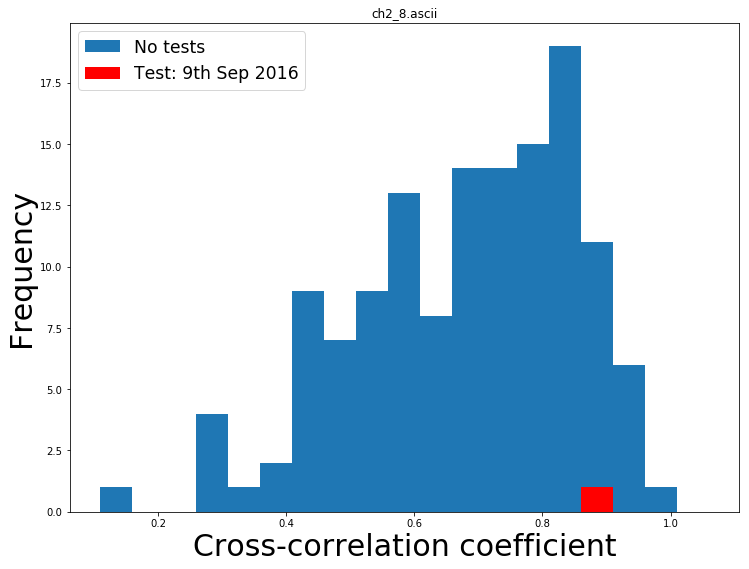

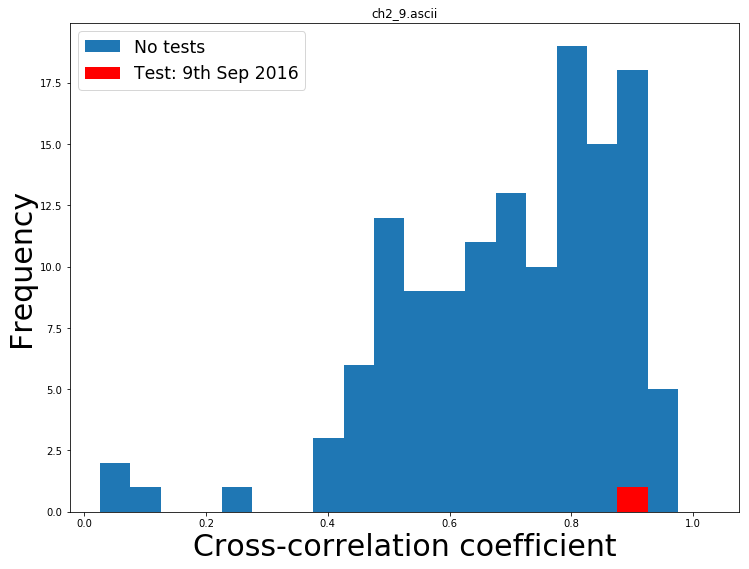

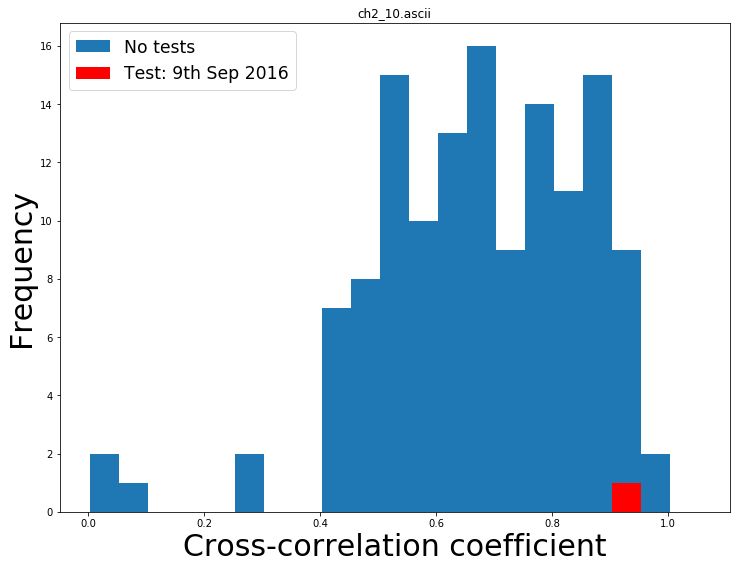

In [17]:
for i in range(11):
    fname = 'ch2_'+str(i)+'.ascii'
    fig = plt.figure(figsize=(12, 9))
    ax = fig.add_subplot(111)
    cor = np.loadtxt(fname)
    ax.hist(cor, bins = np.arange(min(cor), max(cor)+0.1, 0.05), label = 'No tests')
    ax.hist(xv[i], np.arange(min(cor), max(cor)+0.1, 0.05), color = 'red', label = 'Test: 9th Sep 2016')
    plt.title(fname)
    plt.xlabel('Cross-correlation coefficient', fontsize = 30)
    plt.ylabel('Frequency', fontsize = 30)
    plt.legend(fontsize = 'xx-large')
    plt.show()